<a href="https://colab.research.google.com/github/isaacmikhail/TelecomX_challenge_part2_Alura/blob/main/TelecomX_challenge_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe=pd.read_csv('telecomX.csv')

In [4]:
print(dataframe.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'PerfilCliente', 'conta_diaria', 'total_pago'],
      dtype='object')


In [5]:
dataframe.drop(columns=['customerID','PerfilCliente','total_pago'], inplace=True)

In [6]:
dataframe['Charges.Total'].fillna(dataframe['Charges.Total'].median(), inplace=True)

/tmp/ipython-input-2722403661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Charges.Total'].fillna(dataframe['Charges.Total'].median(), inplace=True)


In [7]:
#ONE-HOT Encoding (categoria em uma coluna binária (0 ou 1))
cols_to_encode = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

In [8]:
df_encoded = pd.get_dummies(dataframe, columns=cols_to_encode, drop_first=True)

In [9]:
print(df_encoded.select_dtypes(include='object').columns)

Index([], dtype='object')


In [10]:
print(df_encoded.select_dtypes(include='object').columns.tolist())

[]


In [11]:
# Contagem absoluta
churn_counts = dataframe['Churn'].value_counts()

# Proporção relativa
churn_proportions = dataframe['Churn'].value_counts(normalize=True)

print("Contagem:")
print(churn_counts)
print("\nProporção:")
print(churn_proportions)


Contagem:
Churn
False    5174
True     2093
Name: count, dtype: int64

Proporção:
Churn
False    0.711986
True     0.288014
Name: proportion, dtype: float64


In [12]:
#seperação dados | rótulos

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
#Oversampling com SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificando o balanceamento
print(y_resampled.value_counts())

Churn
False    5174
True     5174
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
#padronização (StandardScaler)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X é o conjunto de features


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


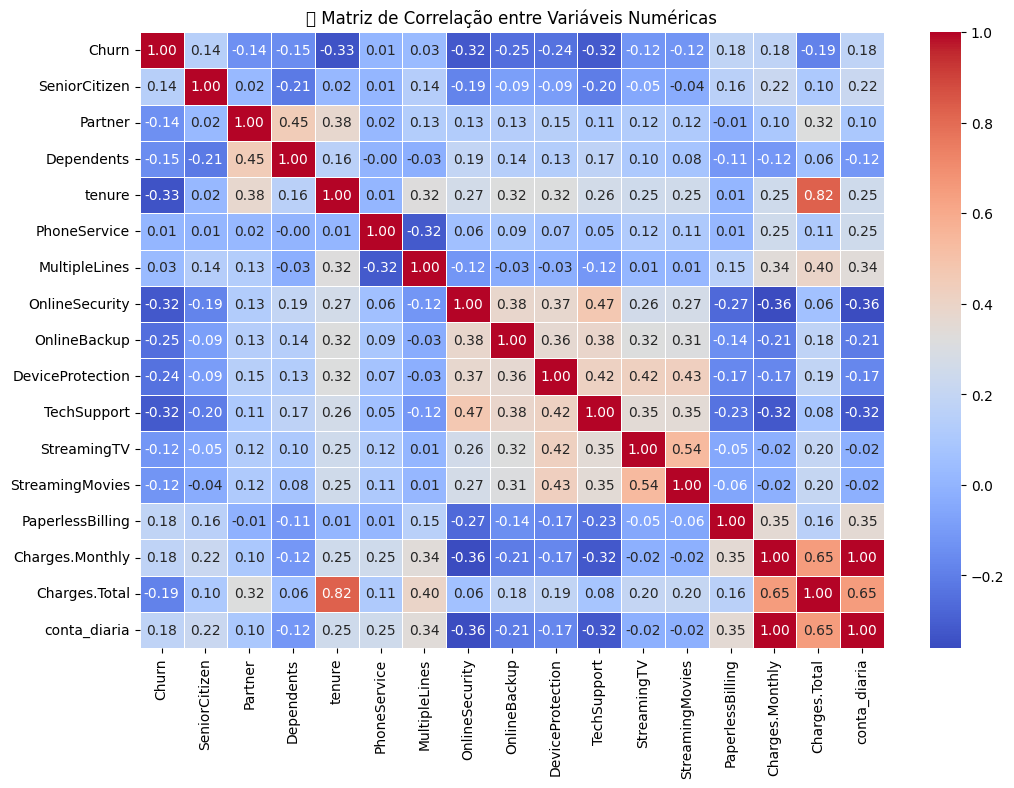

In [17]:
#correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.
corr_matrix = dataframe.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Matriz de Correlação entre Variáveis Numéricas")
plt.show()


/tmp/ipython-input-3187496637.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=dataframe, palette='Set2')


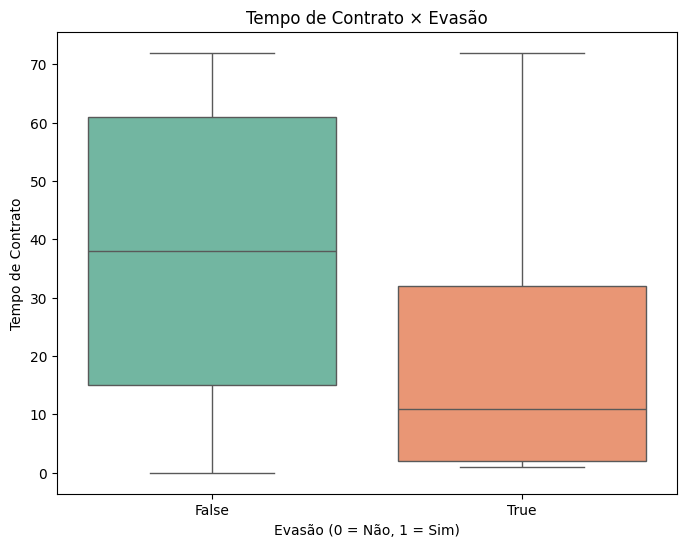

In [18]:
#Análise direcionada

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=dataframe, palette='Set2')
plt.title('Tempo de Contrato × Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contrato')
plt.show()


/tmp/ipython-input-2108212399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=dataframe, palette='Set3')


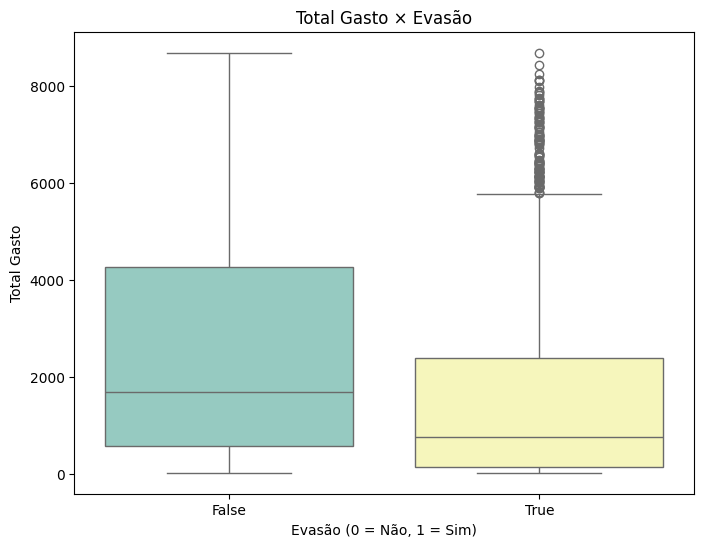

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=dataframe, palette='Set3')
plt.title('Total Gasto × Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Total Gasto')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


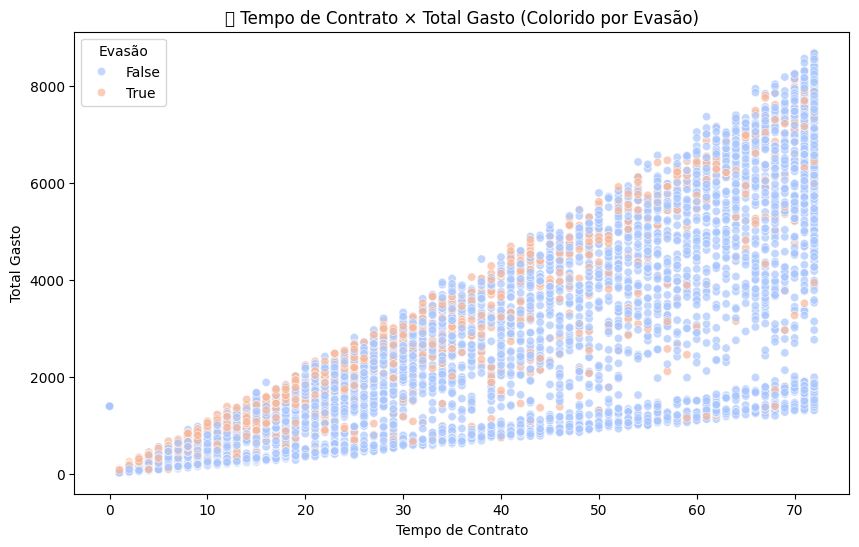

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=dataframe, palette='coolwarm', alpha=0.7)
plt.title('🔍 Tempo de Contrato × Total Gasto (Colorido por Evasão)')
plt.xlabel('Tempo de Contrato')
plt.ylabel('Total Gasto')
plt.legend(title='Evasão')
plt.show()


In [21]:
#Separação de Dados

from sklearn.model_selection import train_test_split

# Separando variáveis preditoras (X) e alvo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Divisão 70% treino / 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
# Criação de Modelos
# - A Regressão Logística é simples, interpretável e eficaz para problemas binários como a coluna Churn do data frame
# - Ela assume que os dados estão em uma mesma escala, pois utiliza coeficientes multiplicativos que podem ser distorcidos por variáveis com magnitudes diferentes.

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


In [23]:
# Selecionar apenas variáveis numéricas para normalização
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Pipeline com normalização + modelo
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Treinamento
pipeline_logreg.fit(X_train[num_cols], y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

In [24]:
# Random Forest (sem normalização)

# - O Random Forest é um modelo baseado em árvores de decisão, que não depende da escala dos dados.
# - Ele é robusto, lida bem com variáveis categóricas e captura interações complexas entre atributos.

from sklearn.ensemble import RandomForestClassifier



In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
#Análise de Importância das Variáveis
# Acessando o modelo treinado dentro do pipeline
logreg_model = pipeline_logreg.named_steps['logreg']

# Pegando os coeficientes
coeficientes = pd.Series(logreg_model.coef_[0], index=X_train[num_cols].columns)

# Exibindo ordenado por importância
print(coeficientes.sort_values(ascending=False))


# Interpretação:
#  Coeficiente positivo → aumenta a chance de evasão
#  Coeficiente negativo → reduz a chance de evasão
#  Quanto maior o valor absoluto, maior a influência


Charges.Monthly    0.468286
conta_diaria       0.468286
Charges.Total     -0.246448
tenure            -0.985849
dtype: float64


In [27]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False))
# interpretação
# Valores mais altos indicam variáveis que mais contribuíram para decisões nos nós das árvores

Charges.Total                            0.165893
tenure                                   0.145369
Charges.Monthly                          0.133463
conta_diaria                             0.132968
TechSupport                              0.039215
OnlineSecurity                           0.035655
PaymentMethod_electronic check           0.034672
InternetService_fiber optic              0.028248
Contract_two year                        0.025867
gender_male                              0.024324
PaperlessBilling                         0.023403
Contract_one year                        0.023332
OnlineBackup                             0.023170
Partner                                  0.021157
DeviceProtection                         0.020286
SeniorCitizen                            0.019511
Dependents                               0.019472
MultipleLines                            0.018123
StreamingTV                              0.014213
StreamingMovies                          0.014169


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


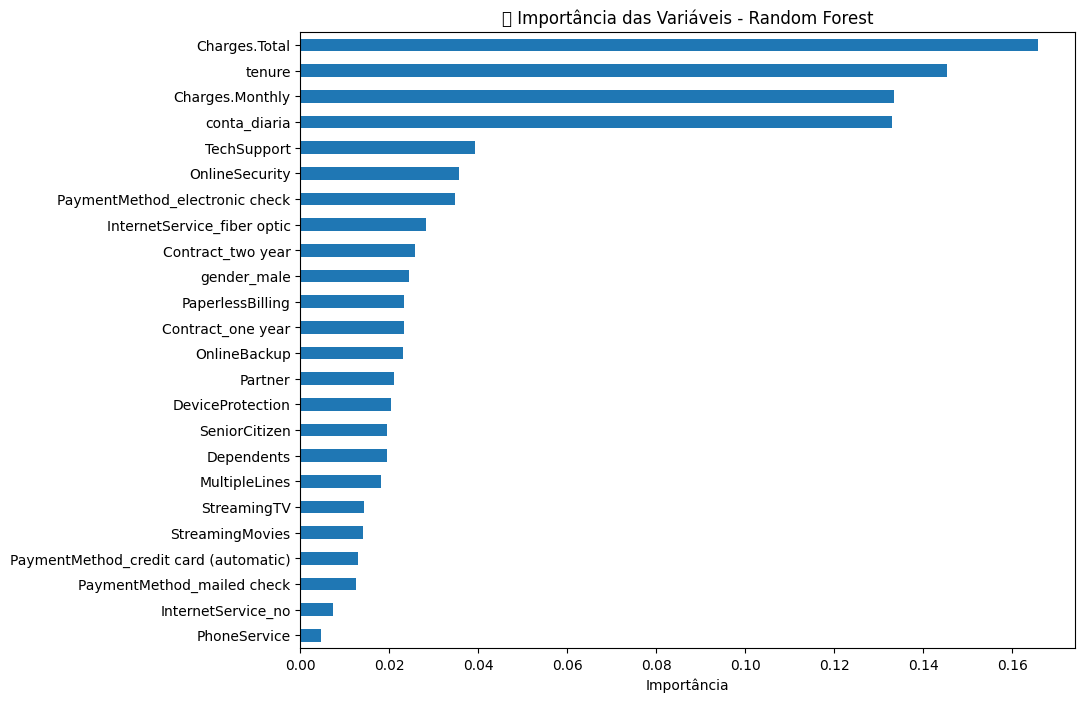

In [28]:
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), title='🌳 Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.show()


In [29]:
#O KNN não fornece coeficientes ou importâncias diretamente. Mas você pode:
#- Normalizar os dados para garantir que todas as variáveis contribuam igualmente
#- Usar técnicas como permutation importance ou SHAP values para estimar impacto
#- Ou aplicar SelectKBest com f_classif para ver quais variáveis têm maior poder discriminativo:

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

scores = pd.Series(selector.scores_, index=X_train.columns)
print(scores.sort_values(ascending=False))


tenure                                   662.059232
OnlineSecurity                           605.276731
TechSupport                              597.035199
PaymentMethod_electronic check           507.400436
InternetService_fiber optic              472.306819
Contract_two year                        465.473045
OnlineBackup                             367.199953
DeviceProtection                         330.170242
InternetService_no                       257.557131
Charges.Total                            205.660475
Contract_one year                        177.536007
conta_diaria                             164.927211
Charges.Monthly                          164.927211
PaperlessBilling                         162.396048
Dependents                               142.099176
SeniorCitizen                            118.818352
Partner                                  106.888437
StreamingMovies                          106.780484
PaymentMethod_credit card (automatic)     95.265787
StreamingTV 

In [ ]:
# Se você usar SVC(kernel='linear'), pode acessar os coeficientes como na regressão logística:


from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

coef_svm = pd.Series(svm_model.coef_[0], index=X_train.columns)
print(coef_svm.sort_values(ascending=False))


Este relatório tem como finalidade identificar os principais fatores que influenciam a evasão de clientes, com base em modelos preditivos aplicados ao conjunto de dados. A partir dos resultados obtidos, são propostas estratégias de retenção orientadas por dados.

Principais Fatores que Influenciam a Evasão
 Regressão Logística — Coeficientes Significativos
- Tempo de contrato (negativo): quanto maior o tempo, menor a chance de evasão.
- Número de reclamações (positivo): clientes com mais reclamações tendem a evadir.
- Interações com suporte (positivo): alto volume de contato com suporte indica insatisfação.
 Random Forest — Importância das Variáveis
- Satisfação do cliente: variável mais importante na redução de impureza.
- Valor mensal pago: clientes com valores mais altos tendem a evadir.
- Serviços adicionais contratados: menor número de serviços correlaciona com maior evasão.
 KNN — Proximidade entre perfis
- Clientes com baixo engajamento digital (uso de app, login no portal) estão mais próximos dos perfis que evadem.
- Idade e localização também influenciam a distância entre os grupos.
 SVM — Fronteira de decisão
- Satisfação e tempo de contrato são as variáveis que mais influenciam a separação entre clientes ativos e evadidos.
